# HomeWork 1 Forward Kinematics
**67340700403 พีรดนย์ เรืองแก้ว**


Find forward kinematics of the following robot

<p align="center">
<img src="../images/Robot1.png" alt="Robot Image" width="300"/>
</p>

In [1]:
import roboticstoolbox as rtb
from math import pi
from spatialmath import SE3
import numpy as np
import math as m

### Use Robotica Toolbox to find the forward kinematics of the robot
Use `rtb.DHRobot` to define the robot and use `fkine` method to find the forward kinematics of the robot.

In [2]:
# Define the robot
robot = rtb.DHRobot([
    rtb.RevoluteDH(d=  13,  a= 0,      alpha= -pi/2),         # Joint 1
    rtb.RevoluteDH(d=  -3, a= 8, alpha= 0),         # Joint 2
    rtb.RevoluteDH(d=  0,       a= 0,      alpha= pi/2),         # Joint 3
    rtb.RevoluteDH(d=  8,  a= 0,      alpha= - pi/2),   # Joint 4 
    rtb.RevoluteDH(d=  0,       a= 0,      alpha= pi/2),        # Joint 5 
    rtb.RevoluteDH(d=  5,   a= 0,      alpha= 0)           # Joint 6

], name='6DOF_DH')
print(robot)


DHRobot: 6DOF_DH, 6 joints (RRRRRR), dynamics, standard DH parameters
┌─────┬────┬────┬────────┐
│ θⱼ  │ dⱼ │ aⱼ │   ⍺ⱼ   │
├─────┼────┼────┼────────┤
│  q1 │ 13 │  0 │ -90.0° │
│  q2 │ -3 │  8 │   0.0° │
│  q3 │  0 │  0 │  90.0° │
│  q4 │  8 │  0 │ -90.0° │
│  q5 │  0 │  0 │  90.0° │
│  q6 │  5 │  0 │   0.0° │
└─────┴────┴────┴────────┘

┌──┬──┐
└──┴──┘



Plot the robot using `plot` method of the robot.

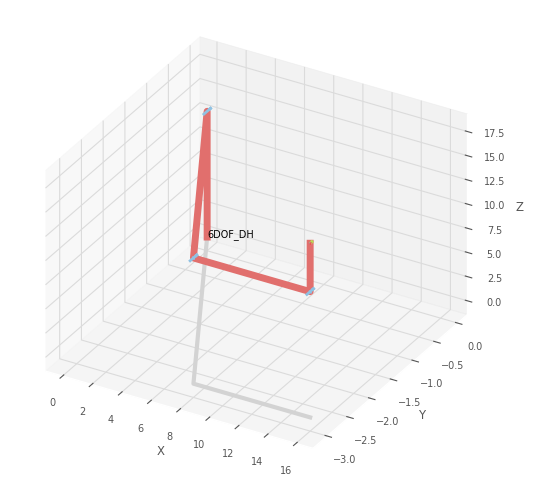

<Figure size 640x480 with 0 Axes>

In [3]:
q = [0, 0, pi/2, 0, -pi/2, 0] 
fig = robot.plot(q, block=False)

In [4]:
T_06 = robot.fkine(q)  # Forward kinematics
print(T_06)

   1         0         0         16        
   0         1         0        -3         
   0         0         1         18        
   0         0         0         1         



### Try to find the forward kinematics of the robot using pure mathematics base from forward kinematics formula

As we know the DH_A matrix is given by
$$
A_i=\begin{bmatrix}
\cos(\theta) & -\sin(\theta)\cos(\alpha) & \sin(\theta)\sin(\alpha) & a\cos(\theta) \\
\sin(\theta) & \cos(\theta)\cos(\alpha) & -\cos(\theta)\sin(\alpha) & a\sin(\theta) \\
0 & \sin(\alpha) & \cos(\alpha) & d \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

where:
- $\theta$ is the angle about the $z_{i-1}$ axis from $x_{i-1}$ to $x_i$
- $d$ is the distance along the $z_{i-1}$ axis from $z_{i-1}$ to $z_i$
- $a$ is the distance along the $x_i$ axis from $x_{i-1}$ to $x_i$
- $\alpha$ is the angle about the $x_i$ axis from $z_{i-1}$ to $z_i$


In [5]:
# Base from above knownledge we create 
# the function to calculate the transformation matrix
def DH_A(theta, d, a, alpha):
    A = np.array([
        [np.cos(theta), -np.sin(theta) * np.cos(alpha), 
         np.sin(theta) * np.sin(alpha), a * np.cos(theta)],
        [np.sin(theta), np.cos(theta) * np.cos(alpha), 
         -np.cos(theta) * np.sin(alpha), a * np.sin(theta)],
        [0, np.sin(alpha), np.cos(alpha), d],
        [0, 0, 0, 1]
    ])
    return A

In [6]:
q = [0, 0, pi/2, 0, -pi/2, 0]
DH_table = np.array([
    [q[0], 13, 0, -pi/2],
    [q[1], -3, 8, 0],
    [q[2], 0, 0, pi/2],
    [q[3], 8, 0, -pi/2],
    [q[4], 0, 0, pi/2],
    [q[5], 5, 0, 0]
])
T = DH_A(DH_table[0, 0], DH_table[0, 1], DH_table[0, 2], DH_table[0, 3])

T = T = SE3()
for i in range(DH_table.shape[0]):
    A = DH_A(DH_table[i, 0], DH_table[i, 1], DH_table[i, 2], DH_table[i, 3])
    T = T @ SE3(A)

print(np.round(T))

[[ 1.  0.  0. 16.]
 [ 0.  1.  0. -3.]
 [ 0.  0.  1. 18.]
 [ 0.  0.  0.  1.]]


Base from use robotics toolbox and use pure mathematics, compare the results of forward kinematics of the robot. this is comfirm that the robotica toolbox is working correctly.

Next show the transformation matrix from frame 0 to frame 1, from frame 1 to frame 2, ..., from frame 5 to frame 6

In [7]:
# show the transformation matrix from frame 0 to frame 1, from frame 1 to frame 2, ..., from frame 5 to frame 6
T = T = SE3()
for i in range(DH_table.shape[0]):
    A = DH_A(DH_table[i, 0], DH_table[i, 1], DH_table[i, 2], DH_table[i, 3])
    T = T @ SE3(A)
    print("transformation matrix from frame {} to frame {}:".format(i, i+1))
    print(np.round(T))

transformation matrix from frame 0 to frame 1:
[[ 1.  0.  0.  0.]
 [-0.  0.  1.  0.]
 [ 0. -1.  0. 13.]
 [ 0.  0.  0.  1.]]
transformation matrix from frame 1 to frame 2:
[[ 1.  0.  0.  8.]
 [-0.  0.  1. -3.]
 [ 0. -1.  0. 13.]
 [ 0.  0.  0.  1.]]
transformation matrix from frame 2 to frame 3:
[[ 0. -0.  1.  8.]
 [ 0.  1.  0. -3.]
 [-1.  0.  0. 13.]
 [ 0.  0.  0.  1.]]
transformation matrix from frame 3 to frame 4:
[[ 0. -1.  0. 16.]
 [ 0.  0.  1. -3.]
 [-1. -0.  0. 13.]
 [ 0.  0.  0.  1.]]
transformation matrix from frame 4 to frame 5:
[[ 1.  0.  0. 16.]
 [ 0.  1.  0. -3.]
 [ 0.  0.  1. 13.]
 [ 0.  0.  0.  1.]]
transformation matrix from frame 5 to frame 6:
[[ 1.  0.  0. 16.]
 [ 0.  1.  0. -3.]
 [ 0.  0.  1. 18.]
 [ 0.  0.  0.  1.]]


So base from find forward kinematics the Rotation matrix is:
$$
R = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$
and the Translation matrix is:
$$
T = \begin{bmatrix}
16 \\
-3 \\
18 \\
1
\end{bmatrix}
$$

Use [vis-ro.web.app](https://vis-ro.web.app/robotics/dh-model) to visualize the robot and compare the results.
here is robot visualization image:

<p align="center">
<img src="../images/robot_view.png" alt="Robot View Image" width="300"/>
</p>